##  Gaussian Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This `Op` performs a [Gaussian blur](https://en.wikipedia.org/wiki/Gaussian_blur) on any image. This is how the `Op` is called:

In [2]:
ij.op().help("gauss")

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.gauss.DefaultGaussRA(
		RandomAccessibleInterval out,
		RandomAccessible in,
		double[] sigmas)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.GaussRAISingleSigma(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double sigma,
		OutOfBoundsFactory outOfBounds?)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.DefaultGaussRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double[] sigmas,
		OutOfBoundsFactory outOfBounds?)

Note the parameters here:

* `RandomAccessibleInterval out`: the (optional) output image
* `RandomAccessibleInterval in`: the input image
* `double[] sigmas`/`double sigma`: the sigma or array of sigmas used in the Gaussian. If you choose an array the array must be as long in length as the number of dimensions of the input image, and if you do not want to perform a Gaussian in a particular dimension set the value for that dimension to `0`. If you choose the single value that value will be applied in all dimensions.
* `OutOfBoundsFactory outOfBounds`: an **optional** parameter that tells the `Op` how to populate the values outside of the image `Interval` when performing the convolution. Since this parameter is optional we will not deal with it in this notebook.

Let's get an image to blur:

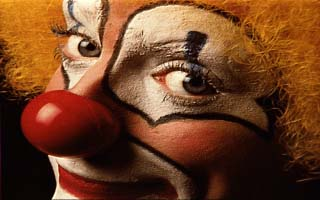

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")

ij.notebook().display(input)

Now that we have our image all we have to do is declare our sigma array and then run the Gaussian:

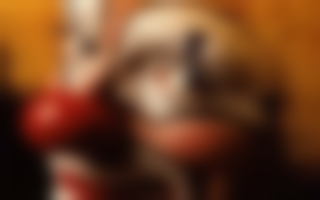

In [4]:
sigmas = [8, 8, 0]

output = ij.op().run("filter.gauss", input, sigmas)

ij.notebook().display(output)